In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_date = pd.read_csv('startup_funding.csv')
df_date.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [28]:
yearfund = {}
for i in df_date['Date'][:5]:
    print(i)

01/08/2017
02/08/2017
02/08/2017
02/08/2017
02/08/2017


# Number of fundings

In [5]:
yearfund = {}
for i in df_date['Date']:
   
    year = i[-4:]
    if yearfund.get(year):
        yearfund[year] = yearfund[year] + 1
    else:
        yearfund[year] = 1
list = []
for i in yearfund:
    list.append(i)
list.sort()
for i in list:
    print(i, yearfund.get(i))
    

2015 936
2016 993
2017 443


# Top indian cities

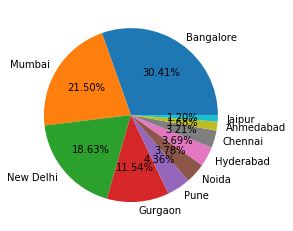

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [6]:
def get_city(location):
    location = str(location)
    if '/' in location:
        loc = location.split('/')
        location = loc[0]
    return location.strip()
df_indian = pd.read_csv('startup_funding.csv')
df_indian.sample(15)
df_indian['CityLocation'] = df_indian['CityLocation'].apply(get_city)
df_indian['CityLocation'] = df_indian['CityLocation'].replace('Delhi', 'New Delhi')
df_indian['CityLocation'] = df_indian['CityLocation'].replace('bangalore', 'Bangalore')
df_indian['CityLocation'] = df_indian['CityLocation'].replace('nan', np.nan)
startup_count = df_indian.groupby('CityLocation').count()['StartupName']
x = startup_count.sort_values(ascending = False).dropna().head(10)
plt.pie(x.values, labels = x.index, autopct = '%.2f%%')
plt.show()
for i in range(x.shape[0]):
    print(x.index[i], x.values[i])

# Funding amount

In [7]:
def get_city(location):
    location = str(location)
    if '/' in location:
        loc = location.split('/')
        location = loc[0]
    return location.strip()
def remove_comma(val):
    if type(val) != int:
        val = float(str(val).replace(',', ''))
    return val

df_indian = pd.read_csv('startup_funding.csv')
df_indian.sample(15)
df_indian['CityLocation'] = df_indian['CityLocation'].apply(get_city)
df_indian['CityLocation'] = df_indian['CityLocation'].replace('Delhi', 'New Delhi')
df_indian['CityLocation'] = df_indian['CityLocation'].replace('bangalore', 'Bangalore')
df_indian['CityLocation'] = df_indian['CityLocation'].replace('nan', np.nan)
df_indian['AmountInUSD'] = df_indian['AmountInUSD'].apply(remove_comma)
startup_funds = df_indian[['CityLocation','AmountInUSD']].groupby('CityLocation').sum().dropna()
x = startup_funds.sort_values(ascending = False, by = 'AmountInUSD').head(10)
pct_list = [round(i/sum(x['AmountInUSD']) *100, 2) for i in x['AmountInUSD']]
for i in range(x.shape[0]):
    print(x.index[i], format(pct_list[i], '.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# Investment type

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


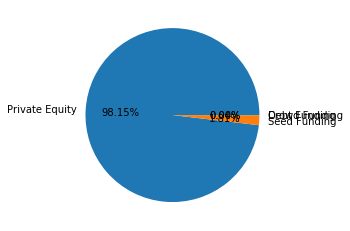

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_investment = pd.read_csv('startup_funding.csv')

def remove_comma(val):
    if type(val) != int:
        val = float(str(val).replace(',', ''))
        return val

df_investment['AmountInUSD'] = df_investment['AmountInUSD'].apply(remove_comma)
df_investment['InvestmentType'] = df_investment['InvestmentType'].replace('SeedFunding', 'Seed Funding')
df_investment['InvestmentType'] = df_investment['InvestmentType'].replace('PrivateEquity', 'Private Equity')
df_investment['InvestmentType'] = df_investment['InvestmentType'].replace('Crowd funding', 'Crowd Funding')
df_investment['InvestmentType'] = df_investment['InvestmentType'].replace('nan', np.nan)
investmentfunds = df_investment[['InvestmentType', 'AmountInUSD']].groupby('InvestmentType').sum().dropna()
x = investmentfunds.sort_values(ascending = False, by = 'AmountInUSD')
pct_list = [round(i/sum(x['AmountInUSD']) *100, 2) for i in x['AmountInUSD']]
for i in range(x.shape[0]):
    print(x.index[i], format(pct_list[i], '.2f'))
plt.pie(x.values, labels = x.index, autopct = '%.2f%%')
plt.show()

# Top industries

C:\Users\Pranav\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


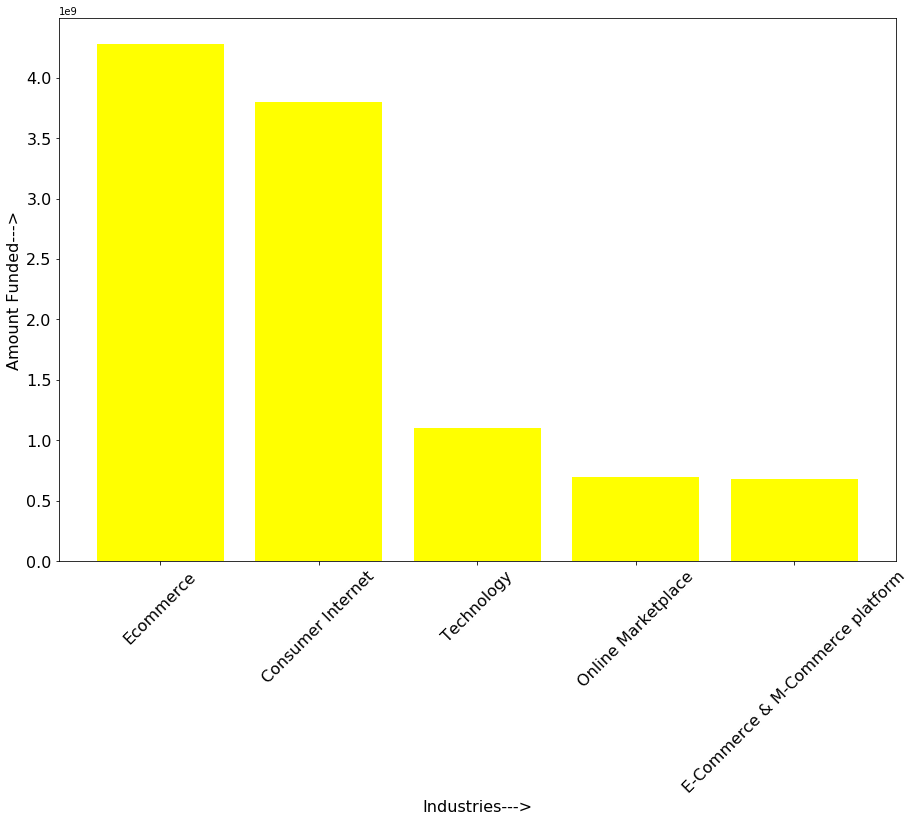

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df=pd.read_csv('startup_funding.csv')
#df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

# Top startups

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
def checkSpell(String):
    newStr = String.replace(' ','').lower()
    if newStr == 'ola' or newStr == 'olacabs':
        String = 'Ola'
    elif newStr == 'flipkart' or newStr == 'flipkart.com':
        String = 'Flipkart'
    elif newStr == 'oyo' or newStr == 'oyorooms' or newStr=='oyoroom' or newStr=='oyofit':
        String = 'Oyo'
    elif newStr == 'paytm' or newStr == 'paytmmarketplace':
        String = 'Paytm'
    return String
    
    
def str2int(string):
    return int(string.replace(',',''))
 
 
data = pd.read_csv('startup_funding.csv')
df   = data.copy()
 
# Handle NaN and convert String to Number
df['StartupName'].fillna('blank',inplace=True)
df['StartupName'] = df['StartupName'].apply(checkSpell)
df.AmountInUSD.fillna("0",inplace=True)
df['AmountInUSD'] = df.AmountInUSD.apply(str2int)
 
groupcols = df[df['StartupName'] !='blank'].groupby(['StartupName'])['AmountInUSD'].sum()
groupcols = groupcols.sort_values()
 
for startup in groupcols.keys()[-1::-1][:5]:
    print(startup)

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Funding rounds

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
def checkSpell(String):
    newStr = String.replace(' ','').lower()
    if newStr == 'ola' or newStr == 'olacabs':
        String = 'Ola'
    elif newStr == 'flipkart' or newStr == 'flipkart.com':
        String = 'Flipkart'
    elif newStr == 'oyo' or newStr == 'oyorooms' or newStr=='oyoroom':
        String = 'Oyo'
    elif newStr == 'paytm' or newStr == 'paytmmarketplace':
        String = 'Paytm'
    return String
    
def remove_comma(val):
    if type(val) != int:
        val = float(str(val).replace(',', ''))
        return val    

 
 
topfundings = pd.read_csv('startup_funding.csv')

 
# Handle NaN and convert String to Number
topfundings['StartupName'].fillna('blank',inplace=True)
topfundings['StartupName'] = topfundings['StartupName'].apply(checkSpell)
groupcols = topfundings.StartupName.value_counts() 
for startup in groupcols.keys()[:5]:
    print(startup,groupcols[startup])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


# Top investor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")

df.InvestorsName.fillna("None", inplace=True)
# df.InvestorsName.unique()

investors = np.array(df.InvestorsName)

final = {}
for i in investors:
    key = i.split(",")

    for i in range(len(key)):
        key[i] = key[i].strip()
        if key[i] != "None" and key[i] != "":
            final[key[i]] = final.get(key[i], 0) + 1

final = dict(sorted(final.items(), key=lambda item: item[1], reverse=True))
# print(final)

for key, value in final.items():
    print(key, value)
    break

Sequoia Capital 64
